In [27]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report


random_state = 27

In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(f'data/{category}'): #path to the folders with data
            img = cv2.imread(f'data/{category}/{image_name}') #path to the folders
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

            img_array = cv2.resize(img, (150,150)) 

            img_lst.append(img_array)
            labels.append(index)
    return img_lst, labels

categories = ['disco', 'electro', 'folk', 'rap', 'rock'] 

img_lst, labels = load_images_and_labels(categories)




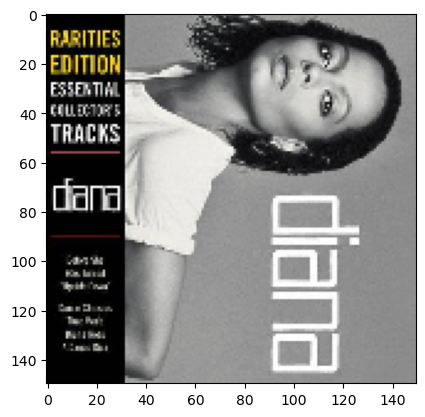

In [7]:
plt.imshow(img_lst[27])
plt.show()

In [10]:
images = np.array(img_lst) / 255.0 #normalization
labels = to_categorical(labels)  #one hot encoding


In [35]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=random_state)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=random_state)


In [34]:
print("x_train shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)


print("x_test shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

print("x_test shape: ", x_val.shape)
print("y_test.shape: ", y_val.shape)

x_train shape:  (5213, 150, 150, 3)
y_train.shape:  (5213, 5)
x_test shape:  (2794, 150, 150, 3)
y_test.shape:  (2794, 5)
x_test shape:  (1304, 150, 150, 3)
y_test.shape:  (1304, 5)


In [29]:

# Define the model
model = Sequential()

# Add model layers
# Convolution layer to extract features from the input image, and then create 32 5x5 ReLu convoluted features, or "feature maps".
# The input shape is the (150, 150, 3) because the images are 150x150 pixels and have three color channels.
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150, 150, 3)))

# Pooling layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolution layer
model.add(Conv2D(64, (5, 5), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to flatten the 2D arrays to 1D array before building the fully connected layers
model.add(Flatten())

# Add a fully connected layer 
model.add(Dense(256, activation='relu'))

# Add a dropout layer for the regularization and avoiding overfitting
model.add(Dropout(0.3))

# Add the output layer with 5 units and a softmax activation function
model.add(Dense(5, activation='softmax'))


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
history = model.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_val, y_val))


Epoch 1/5
25/25 [==============================] - 106s 4s/step - loss: 1.6599 - accuracy: 0.2101 - val_loss: 1.6077 - val_accuracy: 0.2158
Epoch 2/5
25/25 [==============================] - 107s 4s/step - loss: 1.5991 - accuracy: 0.2409 - val_loss: 1.5974 - val_accuracy: 0.2313
Epoch 3/5
25/25 [==============================] - 116s 5s/step - loss: 1.5605 - accuracy: 0.2881 - val_loss: 1.5735 - val_accuracy: 0.2732
Epoch 4/5
25/25 [==============================] - 120s 5s/step - loss: 1.4797 - accuracy: 0.3538 - val_loss: 1.5523 - val_accuracy: 0.2850
Epoch 5/5
25/25 [==============================] - 120s 5s/step - loss: 1.3774 - accuracy: 0.4235 - val_loss: 1.5534 - val_accuracy: 0.2882


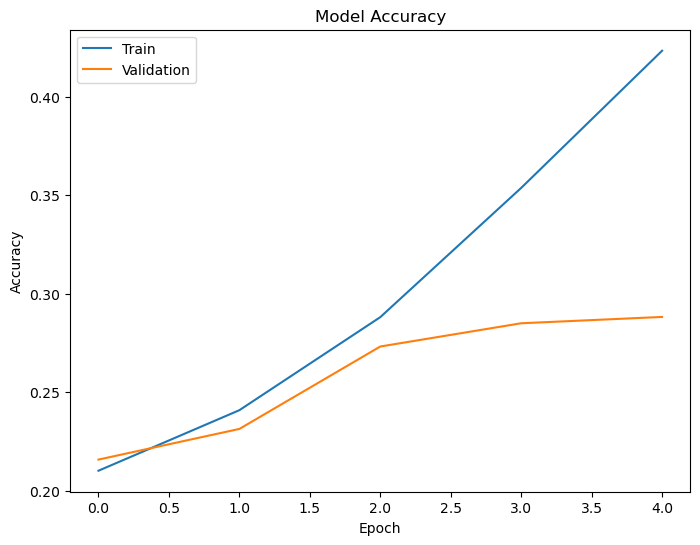

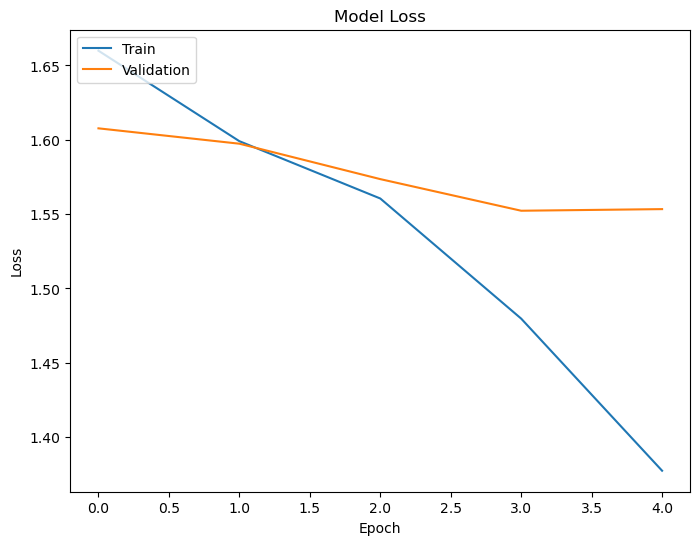

In [24]:
# summarize history for accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [28]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

59/59 [==============================] - 5s 92ms/step
              precision    recall  f1-score   support

           0       0.25      0.30      0.27       371
           1       0.30      0.29      0.30       373
           2       0.21      0.16      0.18       359
           3       0.46      0.36      0.41       379
           4       0.25      0.32      0.28       381

    accuracy                           0.29      1863
   macro avg       0.29      0.29      0.29      1863
weighted avg       0.30      0.29      0.29      1863



Hisotry:


weighted avg 0.29